In [67]:
import os
import glob
from glob import glob
import matplotlib.pyplot as plt
import rasterio as rio
import rioxarray as rxr
import numpy as np
from skimage import exposure
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import adjust_band
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
print('packages loaded')

packages loaded


In [68]:
# SET DIRECTORIES

dirImgLoc = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_*[B02-B04].jp2'
#print(os.listdir(dirImgLoc))

stack_band_paths = glob(dirImgLoc)
stack_band_paths.sort()
print(stack_band_paths)
# Shapefile directory
dirPolyLoc = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/shapefiles/'

#Output directory
out = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/output/'

['/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_B02.jp2', '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_B03.jp2', '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_B04.jp2']


In [62]:
arr_st, meta = es.stack(stack_band_paths, nodata = -9999)

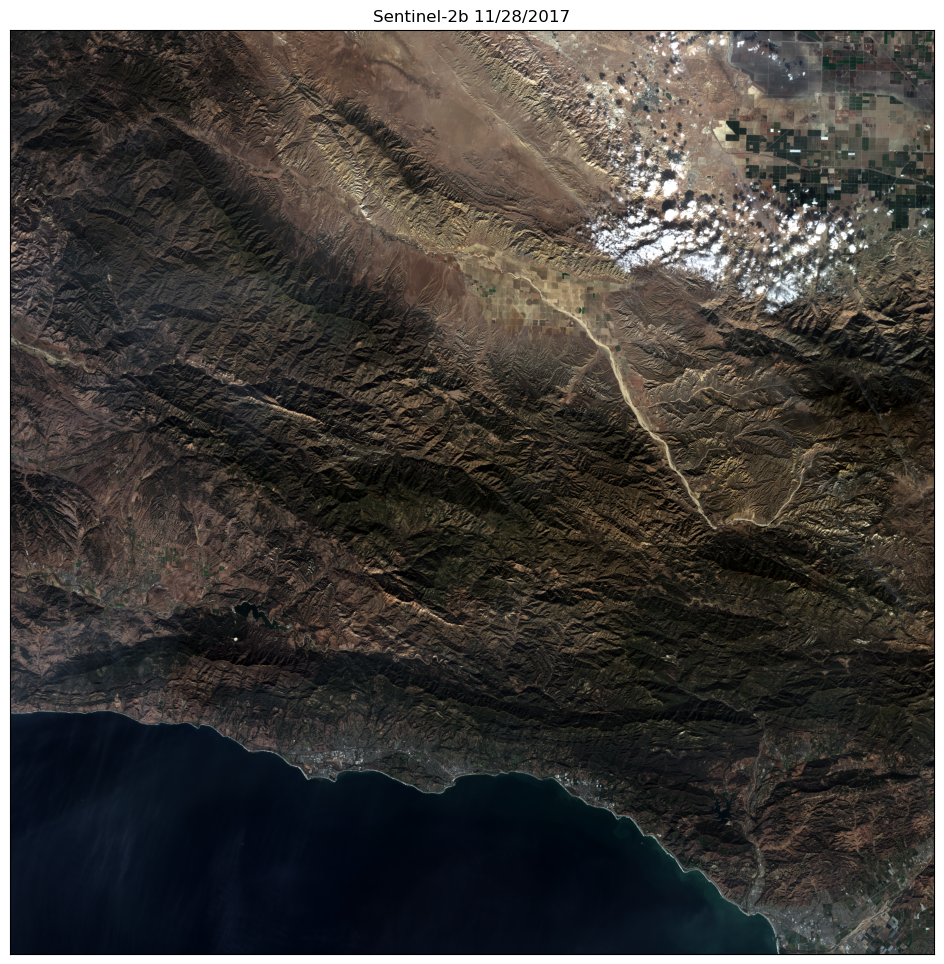

In [63]:
fig, ax = plt.subplots(figsize=(12,12))

ep.plot_rgb(
    arr_st, 
    rgb=(2,1,0), 
    ax=ax,
    stretch=True,
    str_clip=0.5,
    title='Sentinel-2b 11/28/2017')
plt.show()

#fig.savefig(out + 'pre-fire', dpi = 'figure', format='png', metadata=meta, bbox_inches = 'tight')


3


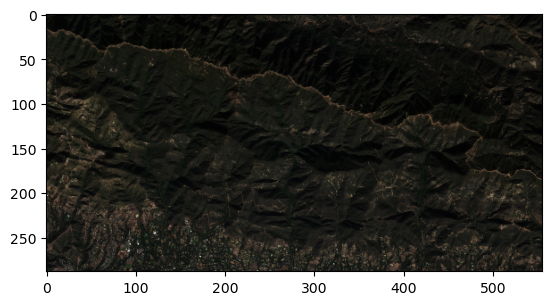

In [83]:
src = rio.open('/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/s2_final_clip.tif')
print(src.count)
red = src.read(3)
green = src.read(2)
blue = src.read(1)

def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

# Create RGB natural color composite
rgb = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
plt.imshow(rgb)
# show(image_norm, transform=src.transform)
# rio.plot.show(image_norm, transform=src.transform, adjust=True)

[[[0.10275367 0.10182507 0.10207507 ... 0.06228794 0.06275224 0.06246652]
  [0.10239651 0.10193221 0.10018215 ... 0.0631094  0.0628951  0.06246652]
  [0.10268224 0.10182507 0.10111075 ... 0.06364513 0.06278796 0.06285939]
  ...
  [0.03207257 0.03207257 0.03210829 ... 0.05446623 0.04882317 0.05253759]
  [0.03221544 0.03253688 0.03250116 ... 0.0527876  0.04921604 0.04696596]
  [0.03221544 0.03239401 0.03217972 ... 0.04632308 0.04410872 0.0394657 ]]

 [[0.09936069 0.10000357 0.09911068 ... 0.06018072 0.05893068 0.05900211]
  [0.09675346 0.09678917 0.09775349 ... 0.06025215 0.05907354 0.05893068]
  [0.09539626 0.09661059 0.09682489 ... 0.05971642 0.05885924 0.05903782]
  ...
  [0.01910783 0.01903639 0.01885782 ... 0.04950177 0.04396586 0.04668024]
  [0.01892925 0.01867924 0.0188221  ... 0.04650166 0.04310868 0.03960856]
  [0.01925069 0.01910783 0.01860781 ... 0.03950141 0.03567985 0.03467981]]

 [[0.10618236 0.10628951 0.10468231 ... 0.067931   0.06753813 0.06764527]
  [0.10539662 0.104682

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


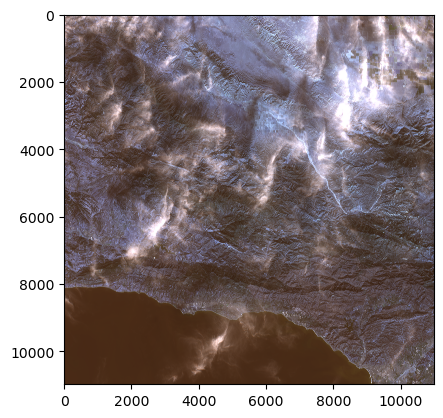

<Axes: >

In [52]:
img = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/'
tcr = rio.open(img)
#print(tcr)
image1 = tcr.read()
rgb_norm = adjust_band(image1)
print(rgb_norm)
#show(rgb_norm)
rgb = rgb_norm*9
print(rgb)
show(rgb)
# image = image1/10000
# print(image)
# #show(image)
# image_norm = (image - image.min()) / (image.max() - image.min())
# print(image_norm)
#show(image_norm)

# imageRed = tcr.read([2])
# #print(imageRed)
# red = imageRed/10000
# #print(red)
# imageGreen = tcr.read([3])
# green = imageGreen/10000
# imageBlue = tcr.read([1])
# blue = imageBlue/10000

# dataPlot = np.zeros((red.shape[1], red.shape[2], 3))
# dataPlot[:, :, 0] = red[0, :, :]
# dataPlot[:, :, 1] = green[0, :, :]
# dataPlot[:, :, 2] = blue[0, :, :]
# dataPlotMask = np.ma.masked_where(dataPlot == 0, dataPlot)

# plt.figure()
# plt.imshow(dataPlotMask)
# plt.show()
